## Metabolome and proteome dataset from yeast kinase knock-outs 

In [1]:
#The dataset comprised of processed data produced in Zelezniak at al, Cell Systems 2018 study. 
#
#metabolites_dataset.data_prep.tsv - processed, batch corrected metabolite levels from glycolysis, pentose phosphate and TCA cycle pathways of yeast kinase knockouts
#columns:
#  metabolite_id - metabolite ID
#  kegg_id - corresponding KEGG metabolite ID (Kanehisa et al 2016)  
#  official_name - the common name of metabolite
#  dataset - the protocol that was used to generate the dataset, for more details please see STAR methods in Zelezniak et al, Cell Systems, 2018 
#  KO_ORF - kinase knockout's ORF, where WT - parental strain/wild-type, for more details please see STAR methods in Zelezniak et al, Cell Systems, 2018
#  KO_gene - kinase knockout's yeast gene name, where WT - parental strain/wild-type, for more details please see STAR methods in Zelezniak et al, Cell Systems, 2018
#  replicate - biological replicate
#  value - metabolite signal obtained from SRM-MS/MS experiment, corrected for batch effects, for more details please see STAR methods in Zelezniak et al, Cell Systems, 2018
#
#proteins_dataset.data_prep.tsv - processed, batch corrected protein levels of yeast kinase knockouts
#columns:
#  ORF - ORF of measured protein
#  sample - sample name from the study
#  replicate - replicate
#  KO_ORF - kinase knockout's ORF, where WT - parental strain/wild-type, for more details please see STAR methods in Zelezniak et al, Cell Systems, 2018
#  KO_gene - kinase knockout's yeast gene name, where WT - parental strain/wild-type, for more details please see STAR methods in Zelezniak et al, Cell Systems, 2018
#  value - label-free protein signal quantification using SWATH-MS, corrected for batch effects, for more details please see STAR methods in Zelezniak et al, Cell Systems, 2018
#
#References:
#  Kanehisa, M., Sato, Y., Kawashima, M., Furumichi, M., and Tanabe, M.; KEGG as a reference resource for gene and protein annotation. Nucleic Acids Res. 44, D457-D462 (2016) 

In [2]:
import pandas as pd
import numpy as np



import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm

- Task

#Which are the proteins which more dramatically influence the metabolites concentrations?
#Is it possible to predict the matabolism (i.e. metabolites concentrations) from the proteome?

- Performance measure

#Predicted metabolite vs measured meatbolite

- Data aquisition/exploration

#Proteome Dataset - Metabolic Profile ---> Explore en edit untill possible to merge

- Data cleaning

#Kinda clean - Several Data to Remove. Important are: Mutant ID (98 in Proteome, 96 in Metabolo. Search and Remove unmatching ones), Protein ID (726 different), Protein Amount, Metsabolite ID (50 different)

- Model selection


- Feature preperation (light version, one-hot encoding)
- Feature engineering (maybe not necessary) 
- Hyperparameter optimization (batch size, tree depth, learning rate,...) 
- Model evaluation
- Model selection and roll out

In [3]:
protein_data = pd.read_csv('../data/proteins_dataset.tsv', delimiter='\t')
protein_data.tail(10)

,ORF,sample,replicate,KO_ORF,KO_gene_name,value
264254,YPR129W,KL_Try_99_c_1,6,YNL183C,NPR1,6.055901
264255,YPR133C,KL_Try_99_c_1,6,YNL183C,NPR1,4.740958
264256,YPR145W,KL_Try_99_c_1,6,YNL183C,NPR1,6.581763
264257,YPR160W,KL_Try_99_c_1,6,YNL183C,NPR1,5.572161
264258,YPR163C,KL_Try_99_c_1,6,YNL183C,NPR1,6.316534
264259,YPR165W,KL_Try_99_c_1,6,YNL183C,NPR1,6.789486
264260,YPR181C,KL_Try_99_c_1,6,YNL183C,NPR1,6.055757
264261,YPR183W,KL_Try_99_c_1,6,YNL183C,NPR1,7.347029
264262,YPR187W,KL_Try_99_c_1,6,YNL183C,NPR1,4.298411
264263,YPR191W,KL_Try_99_c_1,6,YNL183C,NPR1,7.061080


In [4]:
protein_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264264 entries, 0 to 264263
Data columns (total 6 columns):
ORF             264264 non-null object
sample          264264 non-null object
replicate       264264 non-null int64
KO_ORF          264264 non-null object
KO_gene_name    264264 non-null object
value           264264 non-null float64
dtypes: float64(1), int64(1), object(4)
memory usage: 12.1+ MB


In [5]:
protein_data.nunique(axis =0)

ORF                726
sample             364
replicate           12
KO_ORF              98
KO_gene_name        98
value           264264
dtype: int64

In [6]:
#726 proteins, 286 are metabolic enzymes 

In [7]:
list(protein_data.replicate.unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [8]:
mutants = list(protein_data.KO_ORF.unique()) ##create a a list of all the mutants and wild-type strains


In [9]:
#We have 726 different ORF, meaning 726 different proteins. 
#Which of them corroespond to which metabolic pathway?
#Can we group these proteins by cellular compartment?

# We have KO_gene_name. This corresponds to one wild-type strain and the rest are kinase mutants.


In [10]:
metabolites_data = pd.read_csv('../data/metabolites_dataset.tsv', delimiter='\t')
metabolites_data.tail(20)

,metabolite_id,kegg_id,official_name,dataset,genotype,replicate,value
3502,val-L,C00183,L-Valine,3,YHR079C,3,23.081525
3503,val-L,C00183,L-Valine,3,YHR082C,1,30.790476
3504,val-L,C00183,L-Valine,3,YHR082C,2,33.478583
3505,val-L,C00183,L-Valine,3,YHR082C,3,43.236195
3506,val-L,C00183,L-Valine,3,YIL042C,1,32.126453
3507,val-L,C00183,L-Valine,3,YIL042C,2,26.031461
3508,val-L,C00183,L-Valine,3,YIL042C,3,32.056945
3509,val-L,C00183,L-Valine,3,YJL164C,1,18.492225
3510,val-L,C00183,L-Valine,3,YJL164C,2,34.085801
3511,val-L,C00183,L-Valine,3,YJL164C,3,26.693066


In [11]:
metabolites_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3522 entries, 0 to 3521
Data columns (total 7 columns):
metabolite_id    3522 non-null object
kegg_id          3522 non-null object
official_name    3522 non-null object
dataset          3522 non-null int64
genotype         3522 non-null object
replicate        3522 non-null int64
value            3522 non-null float64
dtypes: float64(1), int64(2), object(4)
memory usage: 192.7+ KB


In [12]:
metabolites_data.nunique(axis =0)

metabolite_id      50
kegg_id            50
official_name      50
dataset             3
genotype           96
replicate           3
value            3522
dtype: int64

In [13]:
mutants_metabolome = list(metabolites_data.genotype.unique()) ##create a a list of all the mutants and wild-type strains


In [14]:
a = mutants_metabolome
b = mutants
c = set(a) & set(b)



In [15]:
len(c) #the 96 strains from metabolome coincide with 96 prom proteome. look for the two from proteome that not match

96

In [16]:
def getMatches(a, b):
    matches = []
    unmatches = []

    for i in a:
        if i in b:
            matches.append(i)
        else:
            unmatches.append(i)
    
    
    return unmatches, matches

In [17]:
unmatch, match = getMatches(mutants, mutants_metabolome)
unmatch

['YLR240W', 'YPL031C']

In [18]:
# I have to remove the data corresponding to the not-matching strains, otherwise 
# cannot match my dataframes from protemics and metbolomics

In [19]:
protein_match = protein_data[protein_data.KO_ORF != 'YPL031C']

In [20]:
protein_match = protein_match[protein_data.KO_ORF != 'YLR240W']

/anaconda3/envs/prot-met/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [21]:
protein_match.nunique(axis =0)

ORF                726
sample             358
replicate           12
KO_ORF              96
KO_gene_name        96
value           259908
dtype: int64

In [22]:
metabolites_data.nunique(axis =0)

metabolite_id      50
kegg_id            50
official_name      50
dataset             3
genotype           96
replicate           3
value            3522
dtype: int64

In [23]:
prot_group = protein_match.groupby(['KO_ORF','ORF'])['value'].median().reset_index(name='value_median')


In [24]:
prot_group.head(10)

,KO_ORF,ORF,value_median
0,WT,YAL003W,8.719377
1,WT,YAL005C,8.960088
2,WT,YAL007C,5.003403
3,WT,YAL012W,8.743338
4,WT,YAL035W,5.370779
5,WT,YAL038W,10.313125
6,WT,YAL042W,3.935282
7,WT,YAL044C,6.812850
8,WT,YAR002C-A,6.472343
9,WT,YAR007C,5.387758


In [25]:
prot_group.nunique()

KO_ORF             96
ORF               726
value_median    69696
dtype: int64

In [26]:
prot_group.describe()

,value_median
count,69696.000000
mean,6.314431
std,1.396139
min,1.538128
25%,5.335123
50%,6.260188
75%,7.257425
max,11.180289


In [27]:
#Find the way to remove features (726). 
# So far I don't know which are important. 
#Try removing those with a variance << xx?? 

In [28]:
metab_group = metabolites_data.groupby(['genotype','official_name'])['value'].median().reset_index(name='value_m_median')

In [29]:
metab_group.head(20)

,genotype,official_name,value_m_median
0,WT,2-Oxoglutarate,10.377185
1,WT,3-Phospho-D-glycerate;D-Glycerate 2-phosphate,425.328812
2,WT,6-Phospho-D-gluconate,173.986512
3,WT,Acetyl-CoA,4.820485
4,WT,"But-1-ene-1,2,4-tricarboxylate",0.071690
5,WT,Citrate,22.256750
6,WT,"D-Fructose 1,6-bisphosphate",4766.730677
7,WT,D-Fructose 6-phosphate,5248.663203
8,WT,D-Glucose,16459.030703
9,WT,D-Glucose 6-phosphate;D-Fructose 6-phosphate;b...,14109.667929


In [30]:
metab_group.describe()

,value_m_median
count,2053.000000
mean,4317.310099
std,7252.446734
min,0.009260
25%,35.053616
50%,408.132332
75%,4862.102452
max,58995.535894


In [31]:
metab_group.nunique()

genotype            96
official_name       50
value_m_median    2053
dtype: int64

In [32]:
def getMatches(a, b):
    matches = []
    unmatches = []

    for i in a:
        if i in b:
            matches.append(i)
        else:
            unmatches.append(i)
    
    
    return unmatches, matches

## Create the new dataframes for each matabolite: 

In [33]:
#i.e: 
#726 columns of ORFs (x's)
#1 column of metabolites (y)
#96 rows of mutants (samples)

In [34]:
#proteins as columns
prot_columns = prot_group.pivot(index='KO_ORF', columns='ORF')
prot_columns.columns = prot_columns.columns.droplevel(0) #remove level of multiindex
prot_columns.head(10)

ORF,YAL003W,YAL005C,YAL007C,YAL012W,YAL035W,YAL038W,YAL042W,YAL044C,YAR002C-A,YAR007C,...,YPR129W,YPR133C,YPR145W,YPR160W,YPR163C,YPR165W,YPR181C,YPR183W,YPR187W,YPR191W
KO_ORF,,,,,,,,,,,,,,,,,,,,,
WT,8.719377,8.960088,5.003403,8.743338,5.370779,10.313125,3.935282,6.812850,6.472343,5.387758,...,5.711407,4.560500,6.003440,6.557329,6.617036,6.990033,5.941389,7.084625,4.169592,7.880282
YAL017W,8.653198,8.824927,5.155914,8.670526,5.374893,10.272428,2.955933,6.961889,6.299363,5.526707,...,5.700283,4.250510,6.176480,6.323853,6.557297,6.827223,5.904971,6.971118,4.143712,7.670771
YAR018C,8.797391,8.550221,4.993235,8.556956,5.578207,10.390911,4.389316,7.254334,6.437292,5.498802,...,5.884048,4.439059,6.138866,6.282303,6.254297,7.033319,6.012691,7.100911,4.425224,7.694083
YBL016W,8.543181,8.691758,4.663340,9.116122,3.596748,9.584951,4.563300,8.003110,6.923137,5.737214,...,5.873647,5.618777,6.741446,5.446941,6.169978,6.653605,5.932574,7.500755,6.722786,7.612008
YBL088C,8.694384,8.763244,4.984653,9.056300,3.682467,9.651980,4.139872,7.229609,6.447050,5.264817,...,5.644523,3.844709,6.397196,5.400316,6.551273,6.825362,5.613438,7.400934,4.023677,7.118889
YBR028C,8.625214,8.007757,4.817928,8.883539,5.960631,10.413565,3.808063,6.777236,6.350682,5.357083,...,5.488792,4.582752,6.462288,5.278309,6.415036,6.649445,5.989322,7.178167,4.032628,7.137072
YBR059C,9.387063,9.471319,5.189340,9.159286,3.830269,9.833428,4.747252,7.806826,5.949732,4.876707,...,6.867650,4.666516,5.949743,6.522245,7.364515,7.368997,6.342240,6.732165,4.763805,8.197265
YBR097W,8.472840,8.674740,4.871727,8.592913,4.790504,9.765207,4.755287,6.996898,6.594853,5.215062,...,5.421110,4.151922,6.302866,5.665191,6.474622,6.975164,5.695533,7.486678,3.904309,7.541231
YBR274W,8.594030,8.833184,4.954355,8.695620,5.680016,10.139910,3.944058,7.039784,6.428319,5.925642,...,5.538624,4.707858,6.198100,5.868705,6.650572,7.169207,5.981154,7.172708,4.652042,7.548820


In [35]:
#metabolites as columns
metabolites_columns = metab_group.pivot(index='genotype', columns='official_name')
metabolites_columns.head(10)

value_m_median                                                \
official_name 2-Oxoglutarate 3-Phospho-D-glycerate;D-Glycerate 2-phosphate   
genotype                                                                     
WT                 10.377185                                    425.328812   
YAL017W            11.037795                                      0.558296   
YAR018C            12.390367                                      0.647784   
YBL016W                  NaN                                    668.226067   
YBL088C            10.394328                                      1.081874   
YBR028C                  NaN                                   1102.488213   
YBR059C                  NaN                                   1249.559270   
YBR097W             1.999925                                      1.648729   
YBR274W                  NaN                                    896.588735   
YCL024W            11.722205                                      0.520640   

                                                                              \
official_name 6-Phospho-D-gluconate           ADP          AMP           ATP   
genotype                                                                       
WT                       173.986512           NaN          NaN           NaN   
YAL017W                    3.105345           NaN          NaN           NaN   
YAR018C                    3.442636           NaN          NaN           NaN   
YBL016W                  341.434241           NaN          NaN           NaN   
YBL088C                    5.699103           NaN          NaN           NaN   
YBR028C                  382.594198  20659.090645  4639.058531  25433.292600   
YBR059C                  355.352523  21109.913666  3497.059440  28327.911620   
YBR097W                    4.825343  25745.539763  3998.260070  42378.478642   
YBR274W                  317.819548  21983.069034  3944.450846  23248.349863   
YCL024W                    4.273728           NaN          NaN           NaN   

                                                                    \
official_name Acetyl-CoA But-1-ene-1,2,4-tricarboxylate    Citrate   
genotype                                                             
WT              4.820485                       0.071690  22.256750   
YAL017W         4.270899                       0.065142  31.521351   
YAR018C         4.321632                       0.070769  37.001666   
YBL016W              NaN                            NaN        NaN   
YBL088C         3.585850                       0.052298  17.383795   
YBR028C              NaN                            NaN        NaN   
YBR059C              NaN                            NaN        NaN   
YBR097W         3.546996                       0.049990  70.695140   
YBR274W              NaN                            NaN        NaN   
YCL024W         3.881689                       0.062711  27.093374   

                                       ...                                     \
official_name D-Erythrose 4-phosphate  ... L-Tryptophan L-Tyrosine   L-Valine   
genotype                               ...                                      
WT                                NaN  ...     0.284253  16.674025  22.891406   
YAL017W                     75.358434  ...          NaN        NaN        NaN   
YAR018C                           NaN  ...          NaN        NaN        NaN   
YBL016W                           NaN  ...          NaN        NaN        NaN   
YBL088C                           NaN  ...     0.332703  19.143866  26.605124   
YBR028C                     30.852393  ...          NaN        NaN        NaN   
YBR059C                     42.422041  ...          NaN        NaN        NaN   
YBR097W                     47.766144  ...     0.158494   9.794735  13.371051   
YBR274W                     26.995844  ...          NaN        NaN        NaN   
YCL024W                     43.688624  ...          NaN        NaN        N

In [36]:
metabolites_columns.columns = metabolites_columns.columns.droplevel(0)
metabolites_columns.head()

official_name,2-Oxoglutarate,3-Phospho-D-glycerate;D-Glycerate 2-phosphate,6-Phospho-D-gluconate,ADP,AMP,ATP,Acetyl-CoA,"But-1-ene-1,2,4-tricarboxylate",Citrate,D-Erythrose 4-phosphate,...,L-Tryptophan,L-Tyrosine,L-Valine,Ornithine,Oxaloacetate,Phosphoenolpyruvate,Pyruvate,Sedoheptulose 7-phosphate,Succinate,alpha-D-Ribose 5-phosphate
genotype,,,,,,,,,,,,,,,,,,,,,
WT,10.377185,425.328812,173.986512,NaN,NaN,NaN,4.820485,0.071690,22.256750,NaN,...,0.284253,16.674025,22.891406,154.402877,1.202707,76.375142,2065.592332,474.343120,1.750759,143.661484
YAL017W,11.037795,0.558296,3.105345,NaN,NaN,NaN,4.270899,0.065142,31.521351,75.358434,...,NaN,NaN,NaN,NaN,1.551016,1.349970,85.700836,79.431617,1.658603,0.806534
YAR018C,12.390367,0.647784,3.442636,NaN,NaN,NaN,4.321632,0.070769,37.001666,NaN,...,NaN,NaN,NaN,NaN,1.592769,1.585306,73.672407,108.635344,5.799022,1.148182
YBL016W,NaN,668.226067,341.434241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,103.318199,3495.661987,727.906677,NaN,206.846696
YBL088C,10.394328,1.081874,5.699103,NaN,NaN,NaN,3.585850,0.052298,17.383795,NaN,...,0.332703,19.143866,26.605124,153.712690,1.067331,1.374669,92.136368,81.188838,2.423253,1.095210


In [37]:
#there are many NAN. I guess this is because the are many that where not measured for some mutant/sample. 
#I will keep only the metabolites which were measured only for all the samples.

metabolites_nonan = metabolites_columns.dropna(axis=1)
metabolites_nonan.head()

official_name,3-Phospho-D-glycerate;D-Glycerate 2-phosphate,6-Phospho-D-gluconate,"D-Fructose 1,6-bisphosphate",D-Fructose 6-phosphate,D-Glucose,D-Glucose 6-phosphate;D-Fructose 6-phosphate;beta-D-glucose 6-phosphate,D-Xylulose 5-phosphate;D-Ribulose 5-phosphate,Dihydroxyacetone phosphate,Glyceraldehyde 3-phosphate,Phosphoenolpyruvate,Pyruvate,Sedoheptulose 7-phosphate,alpha-D-Ribose 5-phosphate
genotype,,,,,,,,,,,,,
WT,425.328812,173.986512,4766.730677,5248.663203,16459.030703,14109.667929,921.058392,1758.194055,199.991133,76.375142,2065.592332,474.343120,143.661484
YAL017W,0.558296,3.105345,72.287824,13.066836,17002.046210,13710.190749,951.437296,11.132119,6.455504,1.349970,85.700836,79.431617,0.806534
YAR018C,0.647784,3.442636,104.469366,19.361500,19919.397972,13448.417525,882.991924,14.230257,5.631380,1.585306,73.672407,108.635344,1.148182
YBL016W,668.226067,341.434241,9911.002550,11798.792914,17113.405359,11784.749618,654.096269,2116.528559,219.251307,103.318199,3495.661987,727.906677,206.846696
YBL088C,1.081874,5.699103,66.997327,16.298688,14304.146218,12071.678784,604.834183,17.417181,8.438564,1.374669,92.136368,81.188838,1.095210


In [38]:
metabolites_nonan.info() #only 13 metabolites remain. they are metabolites of glycolisis ?!

<class 'pandas.core.frame.DataFrame'>
Index: 96 entries, WT to YPR111W
Data columns (total 13 columns):
3-Phospho-D-glycerate;D-Glycerate 2-phosphate                              96 non-null float64
6-Phospho-D-gluconate                                                      96 non-null float64
D-Fructose 1,6-bisphosphate                                                96 non-null float64
D-Fructose 6-phosphate                                                     96 non-null float64
D-Glucose                                                                  96 non-null float64
D-Glucose 6-phosphate;D-Fructose 6-phosphate;beta-D-glucose 6-phosphate    96 non-null float64
D-Xylulose 5-phosphate;D-Ribulose 5-phosphate                              96 non-null float64
Dihydroxyacetone phosphate                                                 96 non-null float64
Glyceraldehyde 3-phosphate                                                 96 non-null float64
Phosphoenolpyruvate                      

In [39]:
prot_met = pd.concat([prot_columns, metabolites_columns], axis=1, sort=False)

In [40]:
#merge df of proteins and only useful metabolites.

prot_met_13 = pd.concat([prot_columns, metabolites_nonan], axis=1, sort=False)
prot_met_13.head()

,YAL003W,YAL005C,YAL007C,YAL012W,YAL035W,YAL038W,YAL042W,YAL044C,YAR002C-A,YAR007C,...,D-Fructose 6-phosphate,D-Glucose,D-Glucose 6-phosphate;D-Fructose 6-phosphate;beta-D-glucose 6-phosphate,D-Xylulose 5-phosphate;D-Ribulose 5-phosphate,Dihydroxyacetone phosphate,Glyceraldehyde 3-phosphate,Phosphoenolpyruvate,Pyruvate,Sedoheptulose 7-phosphate,alpha-D-Ribose 5-phosphate
WT,8.719377,8.960088,5.003403,8.743338,5.370779,10.313125,3.935282,6.812850,6.472343,5.387758,...,5248.663203,16459.030703,14109.667929,921.058392,1758.194055,199.991133,76.375142,2065.592332,474.343120,143.661484
YAL017W,8.653198,8.824927,5.155914,8.670526,5.374893,10.272428,2.955933,6.961889,6.299363,5.526707,...,13.066836,17002.046210,13710.190749,951.437296,11.132119,6.455504,1.349970,85.700836,79.431617,0.806534
YAR018C,8.797391,8.550221,4.993235,8.556956,5.578207,10.390911,4.389316,7.254334,6.437292,5.498802,...,19.361500,19919.397972,13448.417525,882.991924,14.230257,5.631380,1.585306,73.672407,108.635344,1.148182
YBL016W,8.543181,8.691758,4.663340,9.116122,3.596748,9.584951,4.563300,8.003110,6.923137,5.737214,...,11798.792914,17113.405359,11784.749618,654.096269,2116.528559,219.251307,103.318199,3495.661987,727.906677,206.846696
YBL088C,8.694384,8.763244,4.984653,9.056300,3.682467,9.651980,4.139872,7.229609,6.447050,5.264817,...,16.298688,14304.146218,12071.678784,604.834183,17.417181,8.438564,1.374669,92.136368,81.188838,1.095210


In [41]:
# save the big dataframes

In [42]:
file_name_all = '../data/all_data.csv'
prot_met.to_csv(file_name_all, index=True)

In [43]:
file_name_13 = '../data/all_data_13.csv'
prot_met_13.to_csv(file_name_13, index=True)

In [44]:
#worked?

In [45]:
mutants = pd.read_csv('../data/all_data_13.csv',index_col=0)
mutants.head(5)

,YAL003W,YAL005C,YAL007C,YAL012W,YAL035W,YAL038W,YAL042W,YAL044C,YAR002C-A,YAR007C,...,D-Fructose 6-phosphate,D-Glucose,D-Glucose 6-phosphate;D-Fructose 6-phosphate;beta-D-glucose 6-phosphate,D-Xylulose 5-phosphate;D-Ribulose 5-phosphate,Dihydroxyacetone phosphate,Glyceraldehyde 3-phosphate,Phosphoenolpyruvate,Pyruvate,Sedoheptulose 7-phosphate,alpha-D-Ribose 5-phosphate
WT,8.719377,8.960088,5.003403,8.743338,5.370779,10.313125,3.935282,6.812850,6.472343,5.387758,...,5248.663203,16459.030703,14109.667929,921.058392,1758.194055,199.991133,76.375142,2065.592332,474.343120,143.661484
YAL017W,8.653198,8.824927,5.155914,8.670526,5.374893,10.272428,2.955933,6.961889,6.299363,5.526707,...,13.066836,17002.046210,13710.190749,951.437296,11.132119,6.455504,1.349970,85.700836,79.431617,0.806534
YAR018C,8.797391,8.550221,4.993235,8.556956,5.578207,10.390911,4.389316,7.254334,6.437292,5.498802,...,19.361500,19919.397972,13448.417525,882.991924,14.230257,5.631380,1.585306,73.672407,108.635344,1.148182
YBL016W,8.543181,8.691758,4.663340,9.116122,3.596748,9.584951,4.563300,8.003110,6.923137,5.737214,...,11798.792914,17113.405359,11784.749618,654.096269,2116.528559,219.251307,103.318199,3495.661987,727.906677,206.846696
YBL088C,8.694384,8.763244,4.984653,9.056300,3.682467,9.651980,4.139872,7.229609,6.447050,5.264817,...,16.298688,14304.146218,12071.678784,604.834183,17.417181,8.438564,1.374669,92.136368,81.188838,1.095210


## Visualize Metabolite  and Protein abundance abundance for each mutant

YBR286W


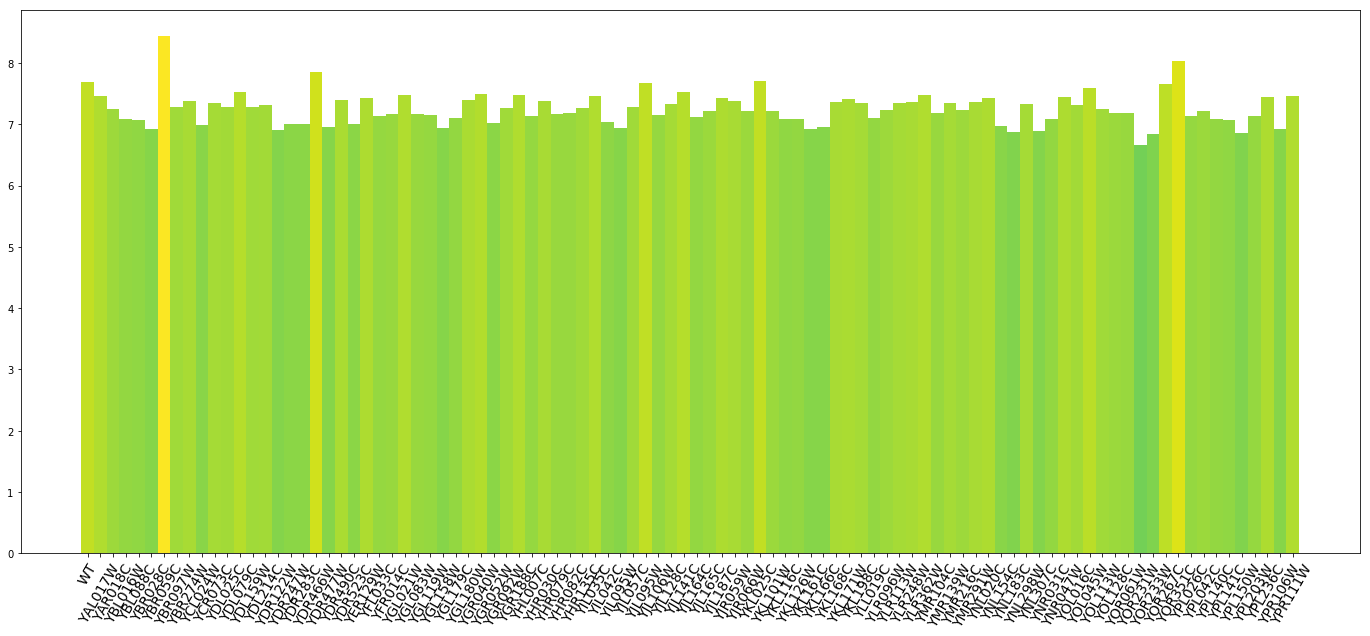

In [46]:
#from 0 to 725 --- PROTEINS
#from 726 to 739 --- METABOLITES

position = 60

color_map = cm.get_cmap('viridis')


x = mutants.index
y = mutants.iloc[:,position]
    
    
#fig
plt.figure(figsize=(24,10))
plt.xticks(fontsize = 14, rotation=60)
plt.title(print(mutants.columns.get_values()[position]))
    
color_array = list()
for y_value in y:
    color_idx =  int(y_value * (color_map.N-1)/y.max())
    color_value = color_map.colors[color_idx]
    color_array.append(mpl.colors.to_hex(color_value))
    
# the barplot
plt.bar(x, y, color=color_array, width=1);



In [47]:
proteins = list(protein_data.ORF.unique()) ##create a a list of all the protein ORFs
proteins


['YAL003W',
 'YAL005C',
 'YAL007C',
 'YAL012W',
 'YAL035W',
 'YAL038W',
 'YAL042W',
 'YAL044C',
 'YAR002C-A',
 'YAR007C',
 'YAR015W',
 'YBL015W',
 'YBL024W',
 'YBL026W',
 'YBL030C',
 'YBL039C',
 'YBL041W',
 'YBL045C',
 'YBL050W',
 'YBL058W',
 'YBL064C',
 'YBL076C',
 'YBL091C',
 'YBL092W',
 'YBL099W',
 'YBR011C',
 'YBR025C',
 'YBR026C',
 'YBR031W',
 'YBR035C',
 'YBR072W',
 'YBR078W',
 'YBR079C',
 'YBR080C',
 'YBR084W',
 'YBR085C-A',
 'YBR088C',
 'YBR089C-A',
 'YBR106W',
 'YBR109C',
 'YBR111C',
 'YBR115C',
 'YBR121C',
 'YBR126C',
 'YBR127C',
 'YBR143C',
 'YBR149W',
 'YBR154C',
 'YBR160W',
 'YBR162C',
 'YBR164C',
 'YBR169C',
 'YBR177C',
 'YBR196C',
 'YBR205W',
 'YBR218C',
 'YBR221C',
 'YBR248C',
 'YBR249C',
 'YBR263W',
 'YBR286W',
 'YCL009C',
 'YCL017C',
 'YCL018W',
 'YCL028W',
 'YCL030C',
 'YCL037C',
 'YCL040W',
 'YCL043C',
 'YCL050C',
 'YCL057W',
 'YCL059C',
 'YCR002C',
 'YCR004C',
 'YCR005C',
 'YCR009C',
 'YCR012W',
 'YCR028C-A',
 'YCR053W',
 'YCR084C',
 'YCR088W',
 'YDL007W',
 'YDL014

### Viualize correlartions between Features 

In [48]:
import seaborn as sns

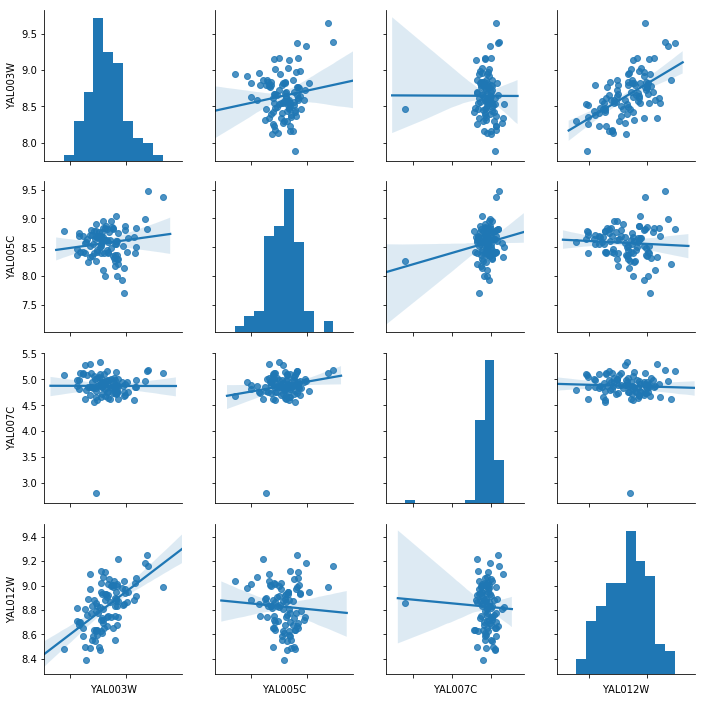

In [49]:
g = sns.pairplot(mutants.iloc[:,0:4], kind="reg")
g.set(xticklabels=[])

In [50]:
#YAL038W - Pyruvate kinase

In [51]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
min_max_scaler.fit(metabolites_nonan)
all_met = min_max_scaler.transform(metabolites_nonan)
all_met = pd.DataFrame(all_met, columns= metabolites_nonan.columns)

In [52]:
all_met.describe()

official_name,3-Phospho-D-glycerate;D-Glycerate 2-phosphate,6-Phospho-D-gluconate,"D-Fructose 1,6-bisphosphate",D-Fructose 6-phosphate,D-Glucose,D-Glucose 6-phosphate;D-Fructose 6-phosphate;beta-D-glucose 6-phosphate,D-Xylulose 5-phosphate;D-Ribulose 5-phosphate,Dihydroxyacetone phosphate,Glyceraldehyde 3-phosphate,Phosphoenolpyruvate,Pyruvate,Sedoheptulose 7-phosphate,alpha-D-Ribose 5-phosphate
count,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000
mean,0.545254,0.485039,0.557568,0.602430,0.448930,0.441080,0.373580,0.436503,0.418842,0.503837,0.522760,0.525969,0.478538
std,0.281114,0.257945,0.266414,0.310623,0.207054,0.186215,0.206177,0.250499,0.252265,0.291505,0.278849,0.251439,0.264558
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.527182,0.418053,0.568183,0.604557,0.291959,0.331317,0.213179,0.337512,0.299108,0.385314,0.445491,0.514035,0.413502
50%,0.653310,0.551593,0.630805,0.713892,0.426921,0.432973,0.359275,0.478933,0.447660,0.544972,0.617819,0.602738,0.525374
75%,0.707985,0.650284,0.716979,0.799258,0.547460,0.540307,0.525121,0.580603,0.585344,0.741155,0.699302,0.670113,0.677701
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Viualize correlartions between Metabolites 


In [53]:
#g = sns.pairplot(all_met, kind="reg")
#g.set(xticklabels=[])